importanto bibliotecas

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Carregando a base de dados

In [2]:
(X_treino, Y_treino), (X_teste, Y_teste) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Normalizando os dados e colocando eles como Float. E deixnado os rotulos em forma de vetor

In [3]:
#Redes neurais  funcionam melhor com números de ponto flutuante (float).
#Isso permite que o modelo aplique operações como multiplicações e gradientes com mais precisão e sem erros inesperados.

X_treino = X_treino.astype('float32') / 255.0
X_teste = X_teste.astype('float32') / 255.0

Y_treino = Y_treino.flatten()
Y_teste = Y_teste.flatten()

In [4]:
X_treino.shape, Y_treino.shape

((50000, 32, 32, 3), (50000,))

Definindo a Rede Neural (VGG)

In [5]:
i = Input(shape=X_treino[0].shape)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

Vamos ver qual Otimizador fica melhor com a rede e o dataset

In [7]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
adam = model.fit(X_treino, Y_treino, epochs=5, batch_size=32, validation_data=(X_teste, Y_teste))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 880s 561ms/step - accuracy: 0.1444 - loss: 2.4703 - val_accuracy: 0.2935 - val_loss: 1.8653
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 959s 585ms/step - accuracy: 0.2431 - loss: 1.9337 - val_accuracy: 0.3485 - val_loss: 1.8192
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 915s 580ms/step - accuracy: 0.4063 - loss: 1.5926 - val_accuracy: 0.4828 - val_loss: 1.4703
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 903s 578ms/step - accuracy: 0.5714 - loss: 1.2157 - val_accuracy: 0.6266 - val_loss: 1.0861
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 920s 577ms/step - accuracy: 0.6422 - loss: 1.0335 - val_accuracy: 0.6931 - val_loss: 0.8980


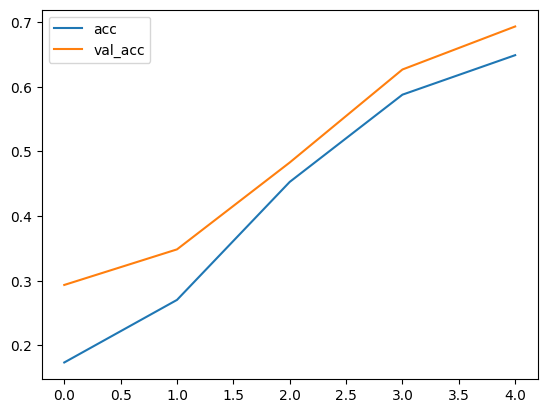

In [8]:
plt.plot(adam.history['accuracy'], label='acc')
plt.plot(adam.history['val_accuracy'], label='val_acc')
plt.legend()

In [6]:
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
sgd = model.fit(X_treino, Y_treino, epochs=5, batch_size=32, validation_data=(X_teste, Y_teste))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 918s 586ms/step - accuracy: 0.2770 - loss: 2.0085 - val_accuracy: 0.4597 - val_loss: 1.4825
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 923s 587ms/step - accuracy: 0.4583 - loss: 1.4753 - val_accuracy: 0.5172 - val_loss: 1.3251
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 891s 570ms/step - accuracy: 0.5311 - loss: 1.2914 - val_accuracy: 0.6129 - val_loss: 1.0987
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 865s 554ms/step - accuracy: 0.5876 - loss: 1.1450 - val_accuracy: 0.6573 - val_loss: 0.9493
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 960s 578ms/step - accuracy: 0.6286 - loss: 1.0497 - val_accuracy: 0.6538 - val_loss: 0.9743


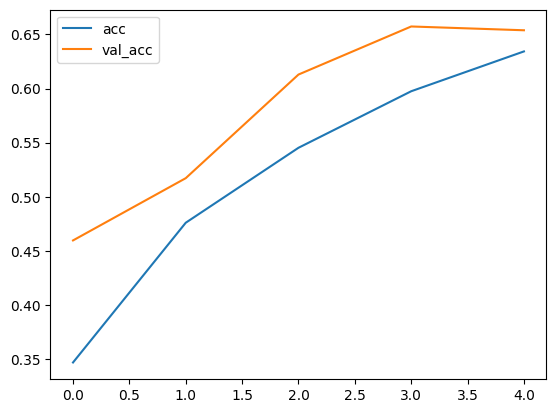

In [7]:
plt.plot(sgd.history['accuracy'], label='acc')
plt.plot(sgd.history['val_accuracy'], label='val_acc')
plt.legend()

In [8]:
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rms = model.fit(X_treino, Y_treino, epochs=5, batch_size=32, validation_data=(X_teste, Y_teste))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 911s 582ms/step - accuracy: 0.6517 - loss: 0.9802 - val_accuracy: 0.6834 - val_loss: 0.9076
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 928s 586ms/step - accuracy: 0.6845 - loss: 0.8999 - val_accuracy: 0.7006 - val_loss: 0.8506
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 908s 581ms/step - accuracy: 0.7022 - loss: 0.8439 - val_accuracy: 0.7228 - val_loss: 0.7925
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 919s 579ms/step - accuracy: 0.7172 - loss: 0.8002 - val_accuracy: 0.7415 - val_loss: 0.7489
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 908s 581ms/step - accuracy: 0.7357 - loss: 0.7561 - val_accuracy: 0.7627 - val_loss: 0.6846


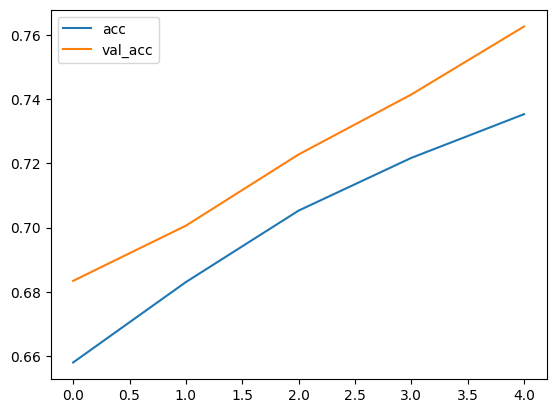

In [9]:
plt.plot(rms.history['accuracy'], label='acc')
plt.plot(rms.history['val_accuracy'], label='val_acc')
plt.legend()